In [1]:
from torch.utils.data import *
import os
import sys
root=os.path.abspath(os.path.join(r"D:\project_meta\NNproject\NNI"))
print(root)
sys.path.append(root)
os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
import warnings  
warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

from project.dataprocess.DatasetProcess import *
from project.dataprocess.SignalProcess import *
from project.dataprocess.FolderTree import *

import seaborn as sns
import matplotlib.pyplot as plt


D:\project_meta\NNproject\NNI


In [5]:

datasetDict=getDataPath(r"D:\dataset\driver_dataset\DROZY\DROZY")
outputDict=getOutPath(r'D:\project_meta\NNproject\NNI\output')

In [6]:
psg_path=datasetDict['psg_folder']
edflist=os.listdir(psg_path)
print(edflist)

['1-1.edf', '1-2.edf', '1-3.edf', '10-1.edf', '10-3.edf', '11-1.edf', '11-2.edf', '11-3.edf', '12-1.edf', '13-1.edf', '13-2.edf', '14-1.edf', '14-2.edf', '14-3.edf', '2-1.edf', '2-2.edf', '2-3.edf', '3-1.edf', '3-2.edf', '3-3.edf', '4-1.edf', '4-2.edf', '4-3.edf', '5-1.edf', '5-2.edf', '5-3.edf', '6-1.edf', '6-2.edf', '6-3.edf', '7-2.edf', '7-3.edf', '8-1.edf', '8-2.edf', '8-3.edf', '9-2.edf', '9-3.edf']


In [7]:
from project.dataprocess.DatasetProcess import *
psg_folder=datasetDict['psg_folder']
kss_file=datasetDict['kss_file']
sfreq=512
N_FFT=15*sfreq
HOP_LEN=5*sfreq
Noncross=False
windowsTable=MakeWindowsTable(psg_folder,kss_file,N_FFT,HOP_LEN)
windowsTable

(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
(40, 5)
       ID  LEVEL  KSS  START    END
0     1.0    1.0  3.0    0.0    5.0
1     1.0    1.0  3.0   15.0   20.0
2     1.0    1.0  3.0   30.0   35.0
3     1.0    1.0  3.0   45.0   50.0
4     1.0    1.0  3.0   60.0   65.0
...   ...    ...  ...    ...    ...
1435  9.0    3.0  8.0  525.0  530.0
1436  9.0    3.0  8.0  540.0  545.0
1437  9.0    3.0  8.0  555.0  560.0
1438  9.0    3.0  8.0  570.0  575.0
1439  9.0    3.0  8.0  585.0  590.0

[1440 rows x 5 columns]


D:\project_meta\NNproject\NNI\project\dataprocess\DatasetProcess.py:166: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  startIndex=torch.range(0,((len(edfFile)-N_FFT)//N_FFT))*N_FFT
D:\project_meta\NNproject\NNI\project\dataprocess\DatasetProcess.py:166: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  startIndex=torch.range(0,((len(edfFile)-N_FFT)//N_FFT))*N_FFT
D:\project_meta\NNproject\NNI\project\dataprocess\DatasetProcess.py:166: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  startIndex=torch.r

,ID,LEVEL,KSS,START,END
0,1.0,1.0,3.0,0.0,5.0
1,1.0,1.0,3.0,15.0,20.0
2,1.0,1.0,3.0,30.0,35.0
3,1.0,1.0,3.0,45.0,50.0
4,1.0,1.0,3.0,60.0,65.0
...,...,...,...,...,...
1435,9.0,3.0,8.0,525.0,530.0
1436,9.0,3.0,8.0,540.0,545.0
1437,9.0,3.0,8.0,555.0,560.0
1438,9.0,3.0,8.0,570.0,575.0


In [8]:
class PSGDataReader(Dataset):
    def __init__(self,psg_path,windowsTable):
        self.PsgPath=psg_path
        self.EdfList=os.listdir(psg_path)
        self.WindowsTable=windowsTable 
    def __len__(self):
        return len(self.WindowsTable) 
    def __getitem__(self,index):
        info=self.WindowsTable.iloc[index]
        filename=str(int(info['ID']))+'-'+str(int(info['LEVEL']))+'.edf'
        filename=os.path.join(self.PsgPath,filename)
        return self.readfile(filename,info['START'],info['END'])
        pass           
    def readfile(self,filename:str,startime,endtime):
        print(filename)
        if filename.endswith('.fif'):
            self.File=mne.io.read_raw_fif(filename,verbose=False)
        if filename.endswith('.edf'):
            self.File=mne.io.read_raw_edf(filename,verbose=False)
        sfreq=self.File.info['sfreq']
        # self.File[:][0][int(startime*sfreq):int(endtime*sfreq)]
        return self.File.copy().crop(startime,endtime)
        #chanenl_name,channel_data
        pass

In [9]:
psg_folder=datasetDict['psg_folder']
kss_file=datasetDict['kss_file']
dataset=PSGDataReader(psg_folder,windowsTable)

D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf
D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf
[44.8        39.82222222 35.84       32.58181818 29.86666667 27.56923077
 25.6        23.89333333 22.4        21.08235294 19.91111111 18.86315789
 17.92       17.06666667 16.29090909 15.5826087  14.93333333 14.336
 13.78461538 13.27407407 12.8        12.35862069 11.94666667 11.56129032
 11.2        10.86060606 10.54117647 10.24        9.95555556  9.68648649
  9.43157895  9.18974359  8.96        8.74146341  8.53333333  8.33488372
  8.14545455  7.96444444  7.79130435  7.62553191  7.46666667  7.31428571
  7.168       7.02745098  6.89230769  6.76226415  6.63703704  6.51636364
  6.4         6.2877193   6.17931034  6.07457627  5.97333333  5.87540984
  5.78064516  5.68888889  5.6         5.51384615  5.43030303  5.34925373
  5.27058824  5.1942029   5.12        5.04788732  4.97777778  4.90958904
  4.84324324  4.77866667  4.71578947  4.65454545  4.59487179  4.53670886
  4.48        4.42469136  4.3

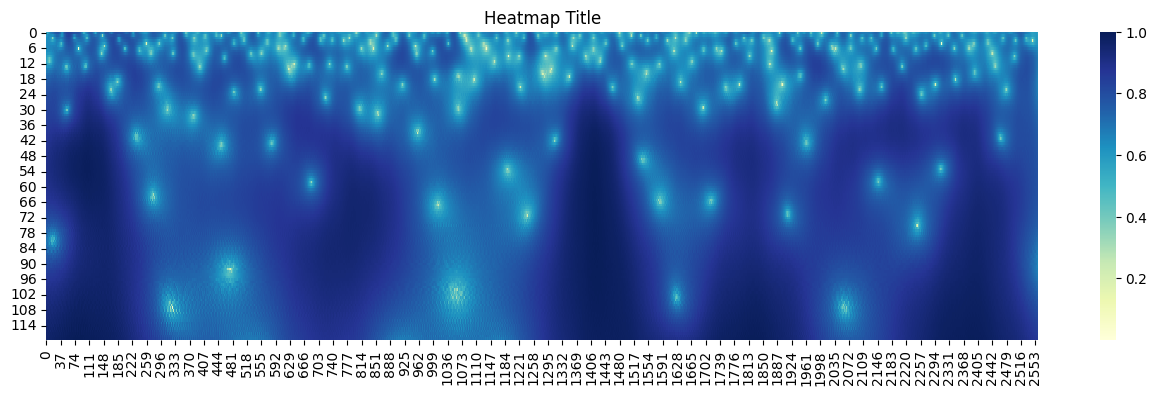

In [28]:
t,frequencies,log_cwtmatr_uniform=getCWTImage(dataset[0],t=dataset[0][1],sfreq=512)
print(frequencies)
f=plt.figure(figsize=(16, 4))

sns.heatmap(log_cwtmatr_uniform.squeeze(1),cmap='YlGnBu')
plt.title('Heatmap Title')
plt.show()

D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf
(512, 17)


D:\project_meta\NNproject\NNI\project\dataprocess\SignalProcess.py:172: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  startIndex=torch.range(0,((len(y)-N_FFT)//HOP_LENGTH))*HOP_LENGTH


<Axes: >

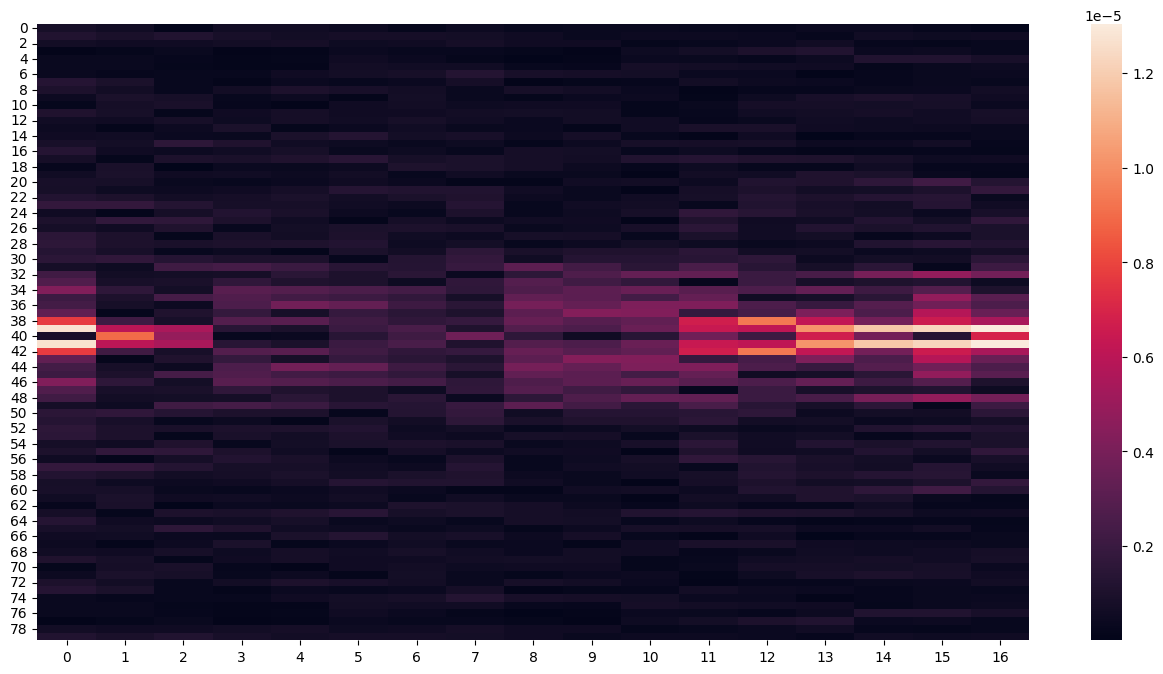

In [27]:
stft,freq=SequenceFFT(dataset[0][0][0][0],512,N_FFT=512,HOP_LENGTH=128)
f=plt.figure(figsize=(16, 8))
print(stft.shape)
sns.heatmap(abs(stft[256-40:256+40,:]))

In [11]:
file=mne.io.read_raw_fif(r"D:\project_meta\NNproject\NNI\output\psg_filted\1-1-EEG.fif")

Opening raw data file D:\project_meta\NNproject\NNI\output\psg_filted\1-1-EEG.fif...
Isotrak not found
    Range : 0 ... 307199 =      0.000 ...   599.998 secs
Ready.


In [32]:
file[:][0][:,512].shape

(5,)